<a href="https://colab.research.google.com/github/highshuang/biostat_deep_learning_spring_2021/blob/develop/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow.keras as keras
import numpy as np
##import data: 
## mount your google drive: 
from google.colab import drive
drive.mount('/content/drive')


KeyboardInterrupt: ignored

(60000, 28, 28)
(60000,)


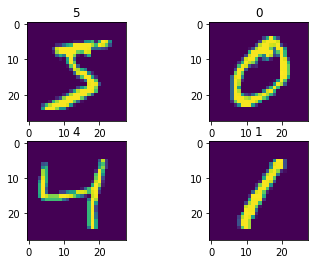

In [ ]:
##path = 'drive/My Drive/deep-learning-colab/mnist.npz'
path = 'mnist.npz'
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data(path)
print(train_images.shape)
print(train_labels.shape)
fig, axs = plt.subplots(2,2)
for ii in np.arange(0,2):
    for jj in np.arange(0,2):
        axs[ii,jj].imshow(train_images[ii*2+jj,:,:])
        axs[ii,jj].title.set_text(train_labels[ii*2+jj])
##print(range(0,2))
##plt.show()

In [ ]:
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [ ]:
network.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [ ]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
train_labels.shape

(60000, 10)

In [ ]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 6s 11ms/step - loss: 0.4232 - accuracy: 0.8787
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.1146 - accuracy: 0.9662
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0722 - accuracy: 0.9784
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0500 - accuracy: 0.9854
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0376 - accuracy: 0.9884


In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print(test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0711 - accuracy: 0.9779
0.9779000282287598
